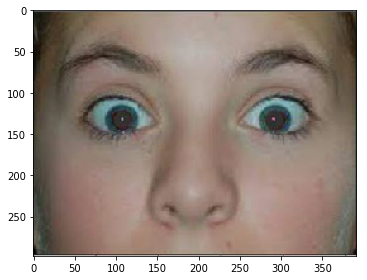

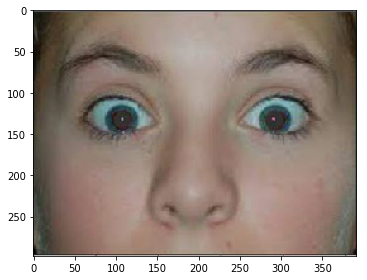

In [5]:
from skimage import io
import matplotlib.pyplot as plt 
import math

def distance(color1, color2):
    dif = 0
    for i in range(0,3):
        dif = dif + math.pow((color1[i]-color2[i]),2)
    return math.sqrt(dif)

def removeRedEye(image,startX,endX,startY,endY,red_eye):
    rows,cols,dims=image.shape
    for i in range(0,rows):
        for j in range(0,cols):
            if (startX <= i <= endX) and (startY <= j <= endY):
                if distance(red_eye,image[i,j])<150:
                    image[i,j,0] = 50 
                    image[i,j,1] = 50 
                    image[i,j,2] = 50
    return image

img=io.imread('red_eye2.jpg')
io.imshow(img)

red_eye = [250, 20, 20]
img2 = removeRedEye(img, 70, 100, 50, 220, red_eye) 
plt.figure()
io.imshow(img2) 
io.show()

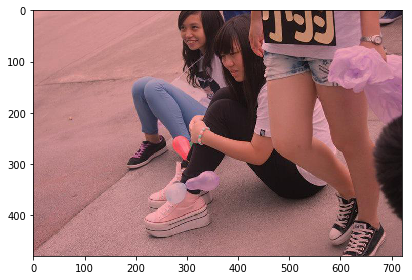

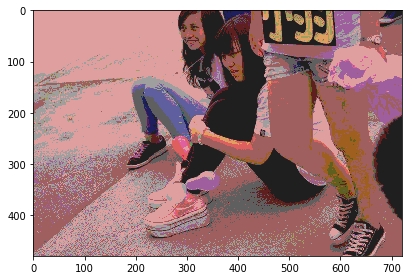

In [7]:
from skimage import io
import matplotlib.pyplot as plt 
import math

def posterize(image): 
    rows,cols,dims=image.shape 
    for i in range(0,rows):
        for j in range(0,cols): # red color change 
            red = image[i,j,0] 
            if (red<64):
                image[i,j,0] = 31
            if (red>63 and red<128):
                image[i,j,0] = 95
            if (red>127 and red<192):
                image[i,j,0] = 159
            if (red>191):
                image[i,j,0] = 223

# green color change 
            green = image[i,j,1] 
            if (green<64):
                image[i,j,1] = 31
            if (green>63 and green<128):
                image[i,j,1] = 95
            if (green>127 and green<192):
                image[i,j,1] = 159
            if (green>191):
                image[i,j,1] = 223

# blue color change 
            blue = image[i,j,2] 
            if (blue<64):
                image[i,j,2] = 31
            if (blue>63 and blue<128):
                image[i,j,2] = 95
            if (blue>127 and blue<192):
                image[i,j,2] = 159
            if (blue>191):
                image[i,j,2] = 223

    return image
img=io.imread('friend.jpg')
io.imshow(img)
img2 = posterize(img) 
plt.figure() 
io.imshow(img2) 
io.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  


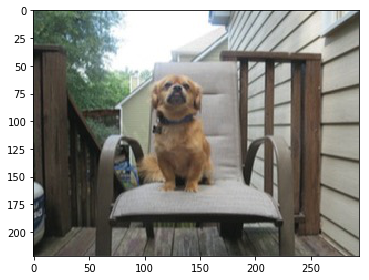

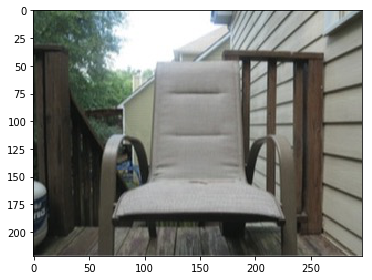

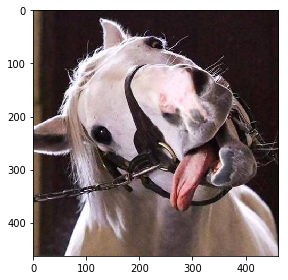

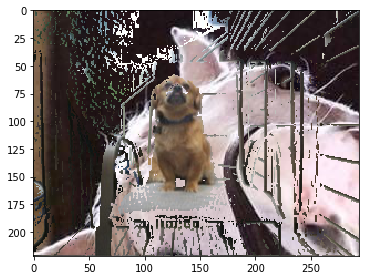

In [10]:
from skimage import io
import matplotlib.pyplot as plt 
import math

def distance(color1, color2):
    dif = 0
    for i in range(0,3):
        dif = dif + math.pow((color1[i]-color2[i]),2)
    return math.sqrt(dif)

def swapBack(image,bg,newBg,thresh): 
    rows,cols,dims=image.shape
    ret_img = image
    for i in range(0,rows):
        for j in range(0,cols):
            dif = distance(image[i,j],bg[i,j])
            if dif < thresh:
                for k in range(0,3):
                    ret_img[i,j,k] = newBg[i,j,k]
 
            else:
                for k in range(0,3):
                    ret_img[i,j,k] = image[i,j,k]
    return ret_img
img=io.imread('dog1.jpg') 
io.imshow(img)

img2=io.imread('dog2.jpg')
plt.figure() 
io.imshow(img2)

img3=io.imread('goldship.jpg') 
plt.figure() 
io.imshow(img3)

threshold = 200
img4 = swapBack(img, img2, img3, threshold) 
plt.figure()
io.imshow(img4) 
io.show()

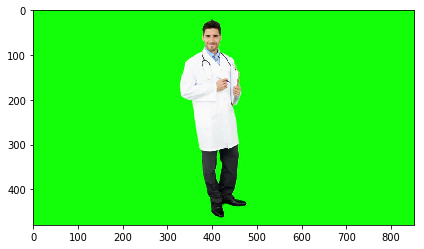

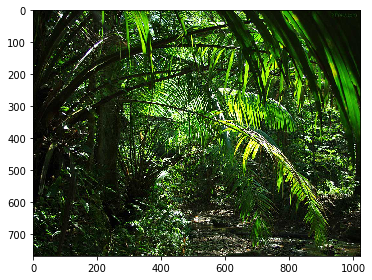

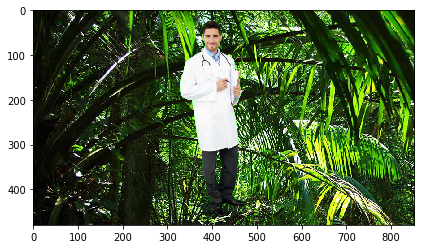

In [13]:
from skimage import io
import matplotlib.pyplot as plt 
import math
import numpy as np

def distance(color1, color2):
    dif = 0
    for i in range(0,3):
        dif = dif + math.pow((color1[i]-color2[i]),2)
    return math.sqrt(dif)

def chromakey(image,newBg,thresh,bgColor):
    rows,cols,dims=image.shape #print(rows)
    ret_img = np.uint8(np.zeros((rows,cols,3)))
    for i in range(0,rows):
        for j in range(0,cols):
            dif = distance(image[i,j],bgColor)
            if dif < thresh:
                for k in range(0,3):
                    ret_img[i,j,k] = newBg[i,j,k]
            else:
                for k in range(0,3):
                    ret_img[i,j,k] = image[i,j,k]
    return ret_img

img=io.imread('chromakey.jpg')
io.imshow(img)

img2=io.imread('jungle1.jpg') 
plt.figure()
io.imshow(img2)

bgcolor = [0, 255, 0] 
threshold = 100

img3 = chromakey(img, img2, threshold, bgcolor)
plt.figure()
io.imshow(img3)